# KNN_Model

## Load the data and merge two dataset

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap

import warnings
warnings.filterwarnings('ignore')

# load train data set and label
df_tr = pd.read_csv('training_set_values.csv', index_col=0)
df_tr_lable = pd.read_csv('training_set_label.csv', index_col=0)
# Combine the lable to the traing set.
def merge_label(df, df_lable):
    for i, row in df.iterrows():
        df.loc[i, 'status'] = df_lable.loc[i]['status_group']
    df.info()

merge_label(df_tr, df_tr_lable)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 non-null  object 
 2   funder                 55765 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              55745 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   wpt_name               59400 non-null  object 
 8   num_private            59400 non-null  int64  
 9   basin                  59400 non-null  object 
 10  subvillage             59029 non-null  object 
 11  region                 59400 non-null  object 
 12  region_code            59400 non-null  int64  
 13  district_code          59400 non-null  int64  
 14  lga                    59400 non-null  object 
 15

In [2]:
df_tr.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [3]:
df = df_tr.copy()
df['date'] = pd.to_datetime(df['date_recorded'])

In [4]:
print('record date from :', df['date'].min())

record date from : 2002-10-14 00:00:00


In [5]:
print('end date :', df['date'].max())

end date : 2013-12-03 00:00:00


## Data Visualisation

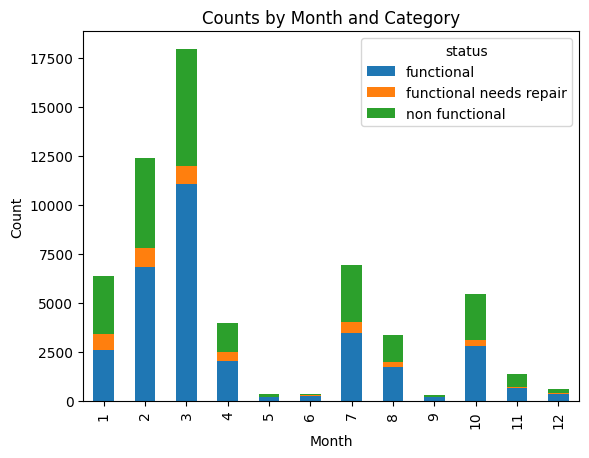

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the date column to a month column
df['month'] = df['date'].dt.month


counts = pd.crosstab(df['month'], df['status'], values=df['status'], aggfunc=len)

# Plot the stacked bar chart
counts.plot(kind='bar', stacked=True)

# Add title and labels
plt.title('Counts by Month and Category')
plt.xlabel('Month')
plt.ylabel('Count')

# Display the plot
plt.show()

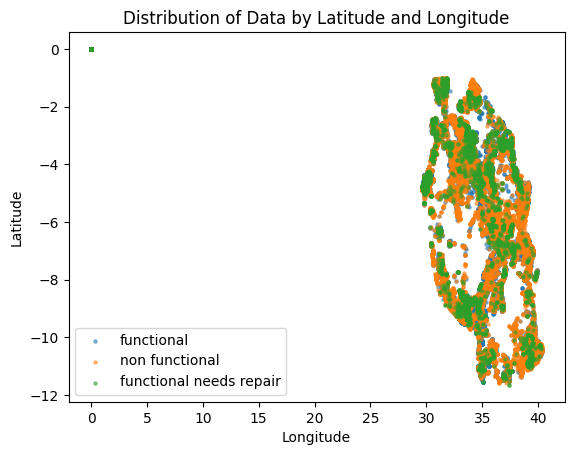

In [7]:
import matplotlib.pyplot as plt

# Get categories

categories = df['status'].unique()

# Iterate over each category
for category in categories:
    #  Extract data for the category
    df_category = df[df['status'] == category]
    # Plot scatter plot
    plt.scatter(df_category['longitude'], df_category['latitude'], s=5, alpha=0.5, label=category)

# Add title and labels
plt.title('Distribution of Data by Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()

# Add title and labels
plt.show()

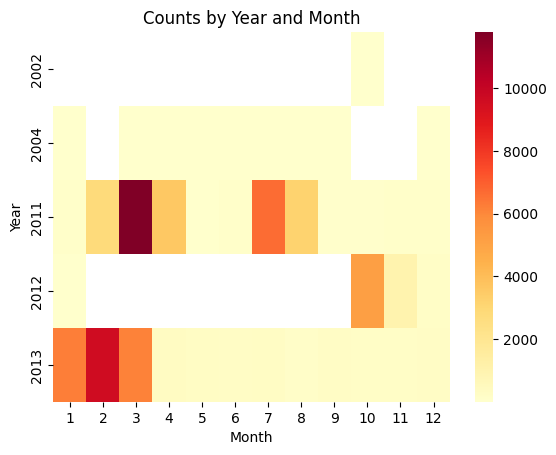

In [8]:
import pandas as pd
import seaborn as sns

# Extract year and month
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Calculate counts by year and month

counts = pd.crosstab(df['year'], df['month'], values=df['status'], aggfunc=len)

# Plot heatmap
sns.heatmap(counts, cmap='YlOrRd', annot=False,  xticklabels=counts.columns.values, yticklabels=counts.index.values)

# Add title and labels
plt.title('Counts by Year and Month')
plt.xlabel('Month')
plt.ylabel('Year')

# Display the plot
plt.show()

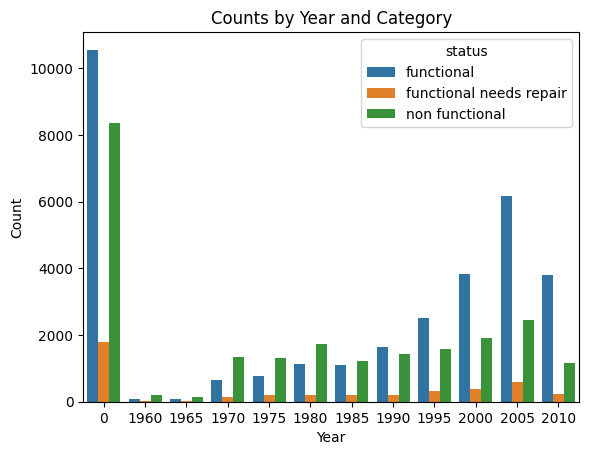

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Calculate counts by year and category
counts = df.groupby(['construction_year', 'status'])['status'].count().reset_index(name='count')

# Group years into 5-year intervals
counts['year_group'] = counts['construction_year'] // 5 * 5

# Calculate counts by year group and category
counts = counts.groupby(['year_group', 'status'])['count'].sum().reset_index()

# Plot the bar chart
sns.barplot(x='year_group', y='count', hue='status', data=counts)

# Add title and labels
plt.title('Counts by Year and Category')
plt.xlabel('Year')
plt.ylabel('Count')

# Show the plot
plt.show()

## Data Cleaning



Some columns may have a large number of enum items. It could take the enumeration value with the highest frequency, and replace the rest of `other`.

In [10]:
def top5_values(df, column_name):
    return df[column_name].value_counts().nlargest(5).index.tolist()

def divede(row, ls, str):
    return row[str] if row[str] in ls else 'other'

def classify(df):
    column_list = ['funder', 'scheme_management']
    for i in column_list:
        df[i] = df.apply(divede, args=(top5_values(df, i), i), axis=1)

classify(df_tr)


Quick went through the dataset, write a script to check out all NaN value.

In [11]:
def check_invalid(df):
    rows_num = df.shape[0]
    for col in df.columns:
        col_isna_num = df[col].isna().sum()
        if col_isna_num > 0:
            print('`{}` has {} Nan value, portion: {:.2%}'.format(col, col_isna_num, col_isna_num/rows_num))

check_invalid(df_tr)

`installer` has 3655 Nan value, portion: 6.15%
`subvillage` has 371 Nan value, portion: 0.62%
`public_meeting` has 3334 Nan value, portion: 5.61%
`scheme_name` has 28166 Nan value, portion: 47.42%
`permit` has 3056 Nan value, portion: 5.14%


In [12]:
# check missing values
missing=pd.DataFrame(df_tr.isnull().sum()).reset_index()
missing.columns=['feature','missing_values']
missing

,feature,missing_values
0,amount_tsh,0
1,date_recorded,0
2,funder,0
3,gps_height,0
4,installer,3655
5,longitude,0
6,latitude,0
7,wpt_name,0
8,num_private,0
9,basin,0


In [13]:
# remove the columns whcih contains more than 20% missing valus
col_names = []
for feature, missing_values in zip(missing['feature'], missing['missing_values']):
    if missing_values / len(df_tr) <= 0.2:
        col_names.append(feature)
print(col_names)
len(col_names)

['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name', 'num_private', 'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward', 'population', 'public_meeting', 'recorded_by', 'scheme_management', 'permit', 'construction_year', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group', 'status']


39

In [14]:
# remove missing values
df_tr=df_tr[col_names].dropna(axis=0)
df_tr.shape

(51725, 39)


Drop duplicate rows in the dataset. As the result, the dataset do not contain duplicate rows.

In [15]:
def drop_duplicate(df):
    print('number of rows before deduplicate: {} rows'.format(df.shape[0]))
    df.drop_duplicates(inplace=True)
    print('number of rows after deduplicate: {} rows'.format(df.shape[0]))
    
drop_duplicate(df_tr)

number of rows before deduplicate: 51725 rows
number of rows after deduplicate: 51709 rows


## Feature Engineering

In [16]:
print(df_tr['status'].unique())

['functional' 'non functional' 'functional needs repair']


In [17]:
df_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51709 entries, 69572 to 26348
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             51709 non-null  float64
 1   date_recorded          51709 non-null  object 
 2   funder                 51709 non-null  object 
 3   gps_height             51709 non-null  int64  
 4   installer              51709 non-null  object 
 5   longitude              51709 non-null  float64
 6   latitude               51709 non-null  float64
 7   wpt_name               51709 non-null  object 
 8   num_private            51709 non-null  int64  
 9   basin                  51709 non-null  object 
 10  subvillage             51709 non-null  object 
 11  region                 51709 non-null  object 
 12  region_code            51709 non-null  int64  
 13  district_code          51709 non-null  int64  
 14  lga                    51709 non-null  object 
 15

### Encode

In [18]:
# applying labelencode
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

df_tr['date_recorded'] = pd.to_datetime(df_tr['date_recorded'])
df_tr['date_recorded'] = df_tr['date_recorded'].dt.year

drop_list = ['num_private','wpt_name','quantity_group','management_group','subvillage']

df_tr1 = df_tr.drop(columns=drop_list)
# convert these two columns to str
df_tr1['permit'] = df_tr1['permit'].astype(str)
df_tr1['public_meeting'] = df_tr1['public_meeting'].astype(str)


# create an instance of the LabelEncoder class
def encode(data):
    encoder = preprocessing.LabelEncoder()
    return encoder.fit_transform((data))

# iterate over the columns to encode and transform each column
for col in df_tr1.columns:
    df_tr1[col] = encode(df_tr1[col])

df_tr1.info


<bound method DataFrame.info of        amount_tsh  date_recorded  funder  gps_height  installer  longitude  \
id                                                                           
69572          58              2       5        1448       1348      23265   
34310          12              4       5         744       1836      38366   
67743           0              4       5         322       1655      43823   
19728           0              2       5          59        110       4707   
9944           11              2       5          59        350      47938   
...           ...            ...     ...         ...        ...        ...   
11164          30              2       4         410        925      40015   
60739           8              4       5        1268        180      36344   
27263          54              2       5        1270        239      24554   
31282           0              2       5          59       1082      28461   
26348           0              2

### Target and Input Features

In [19]:
target=df_tr1.status
df_tr2=df_tr1.drop(columns=['status'])
len(df_tr2.columns)

33

### Feature Analysis

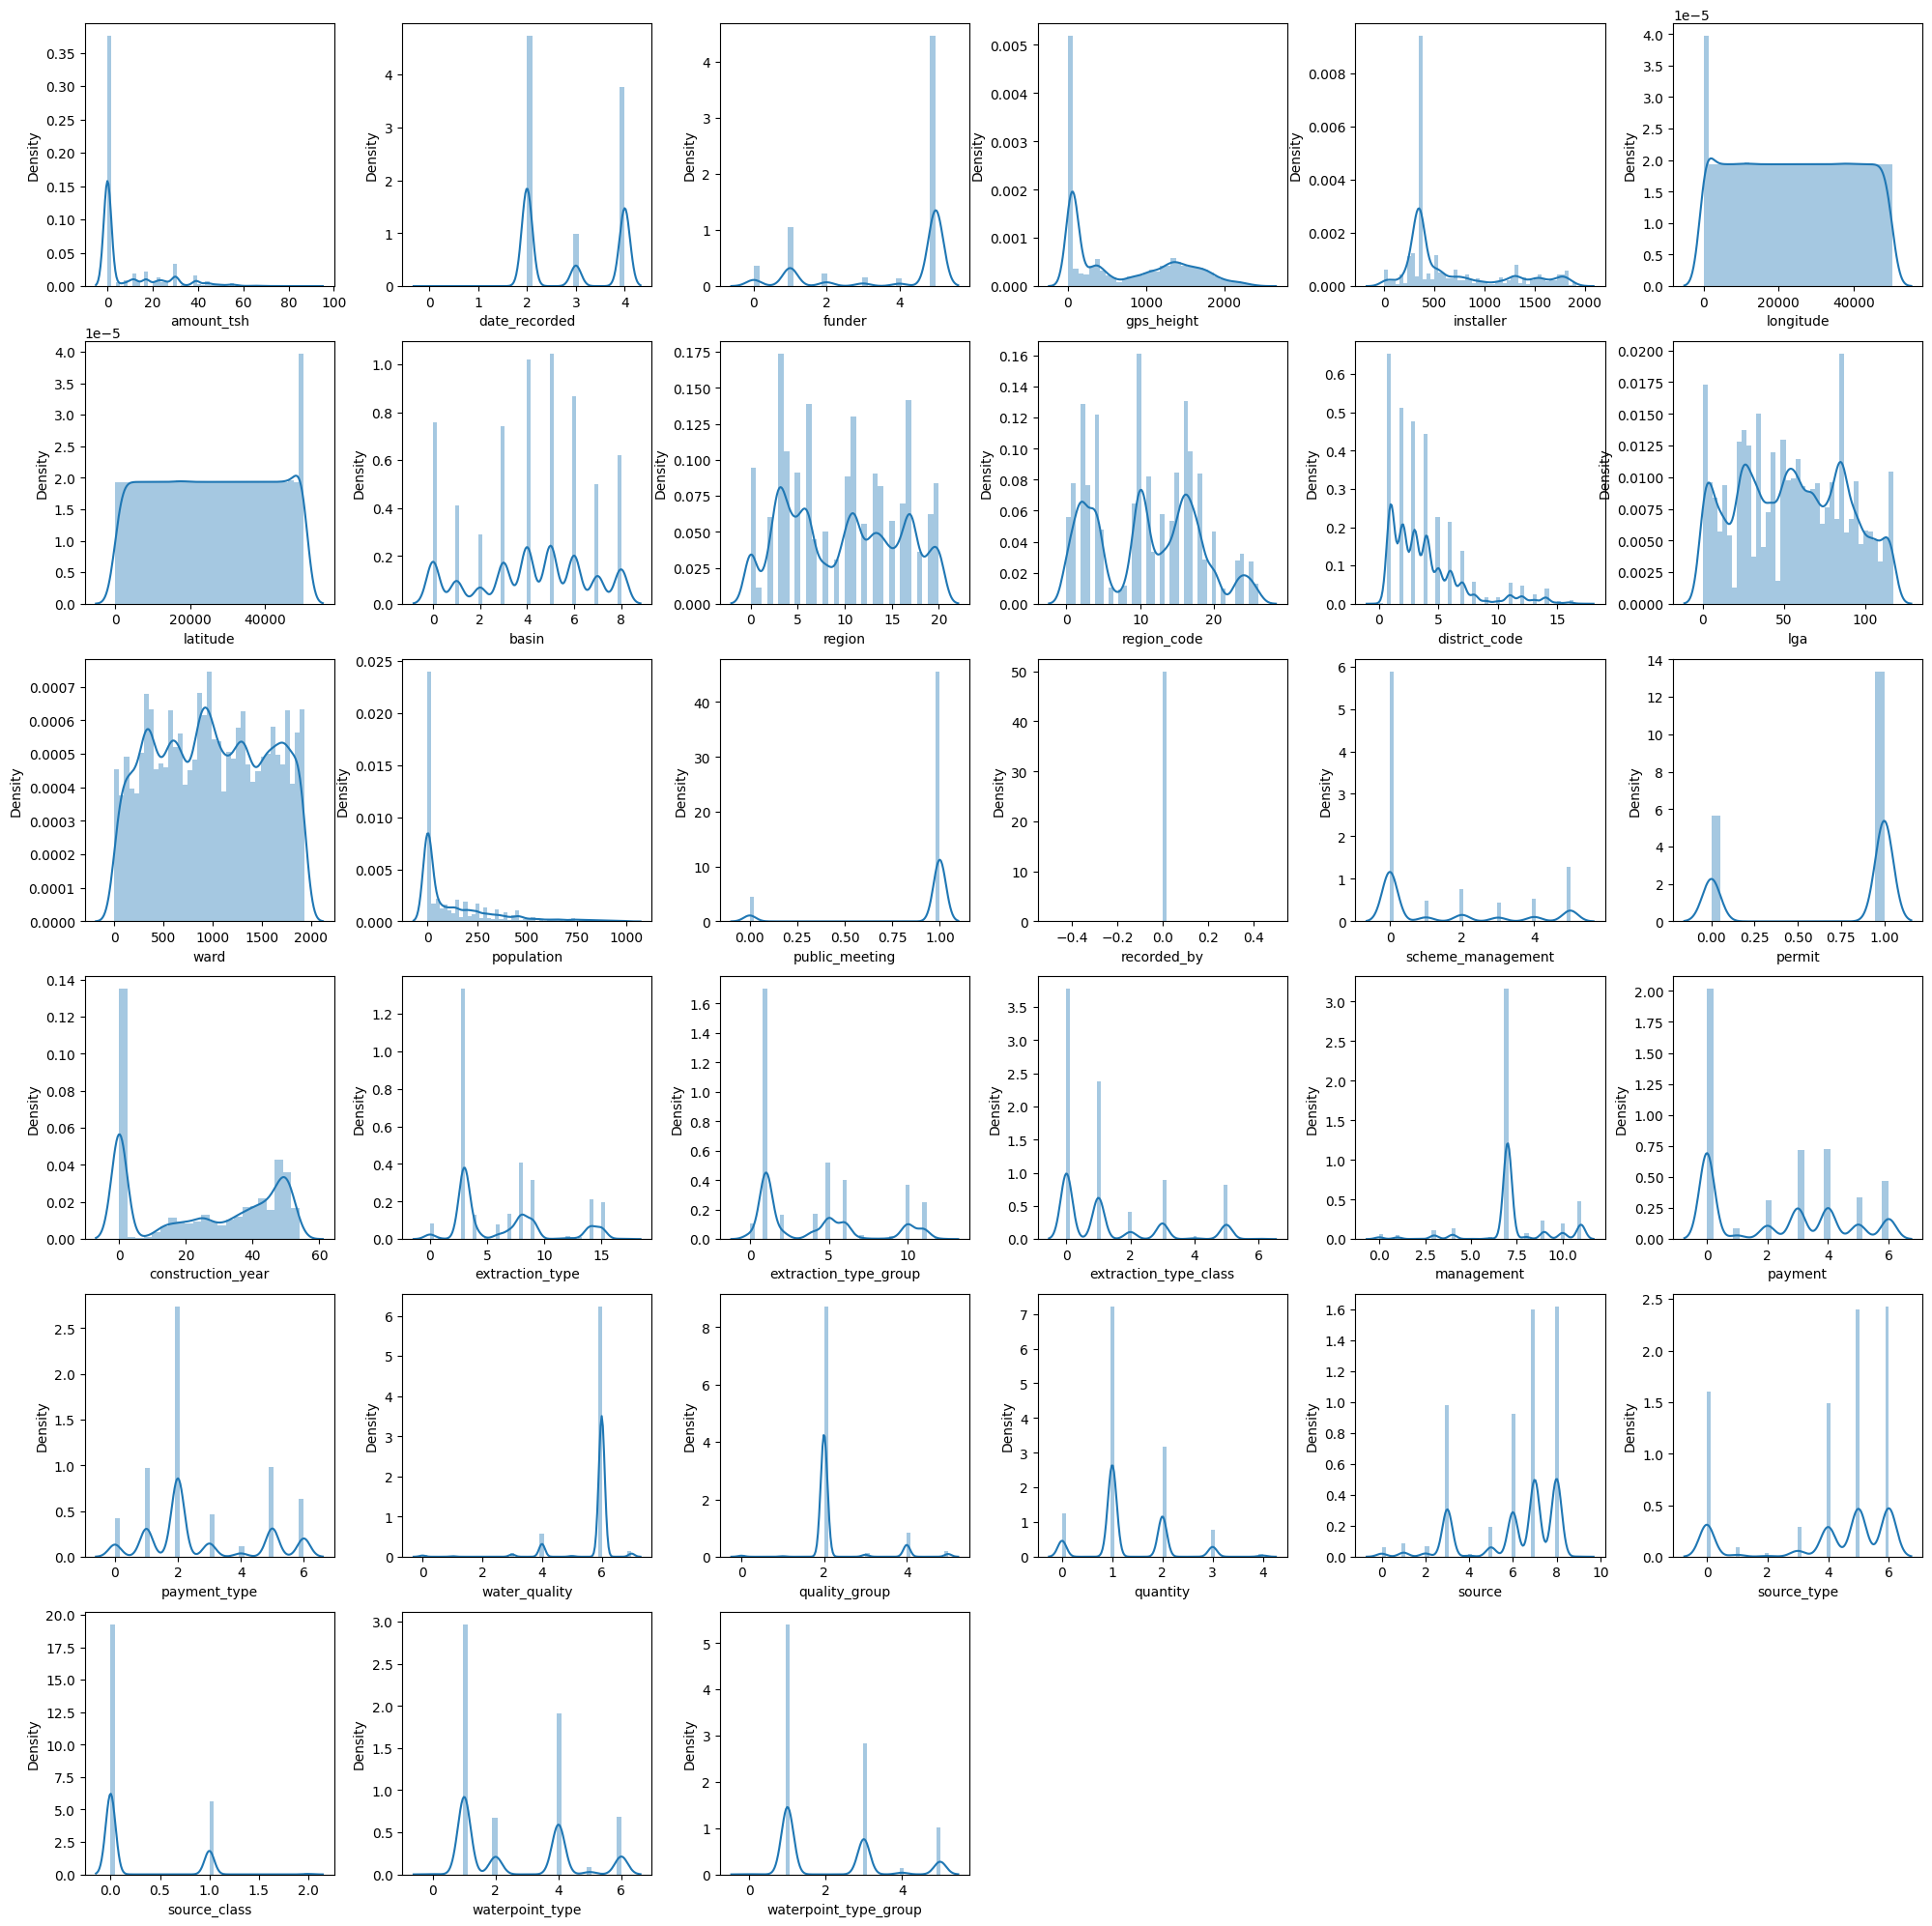

In [20]:
# density graph
fig, axes = plt.subplots(6, 6, figsize=(20,20))

fig.tight_layout(pad=2)

axes = axes.flatten()

for idx, feature in enumerate(df_tr2.columns.tolist()):
    sns.distplot(df_tr2[feature], ax=axes[idx])

if len(df_tr2.columns.tolist()) < len(axes):
    for j in range(len(df_tr2.columns.tolist()), len(axes)):
        fig.delaxes(axes[j])    
plt.show()


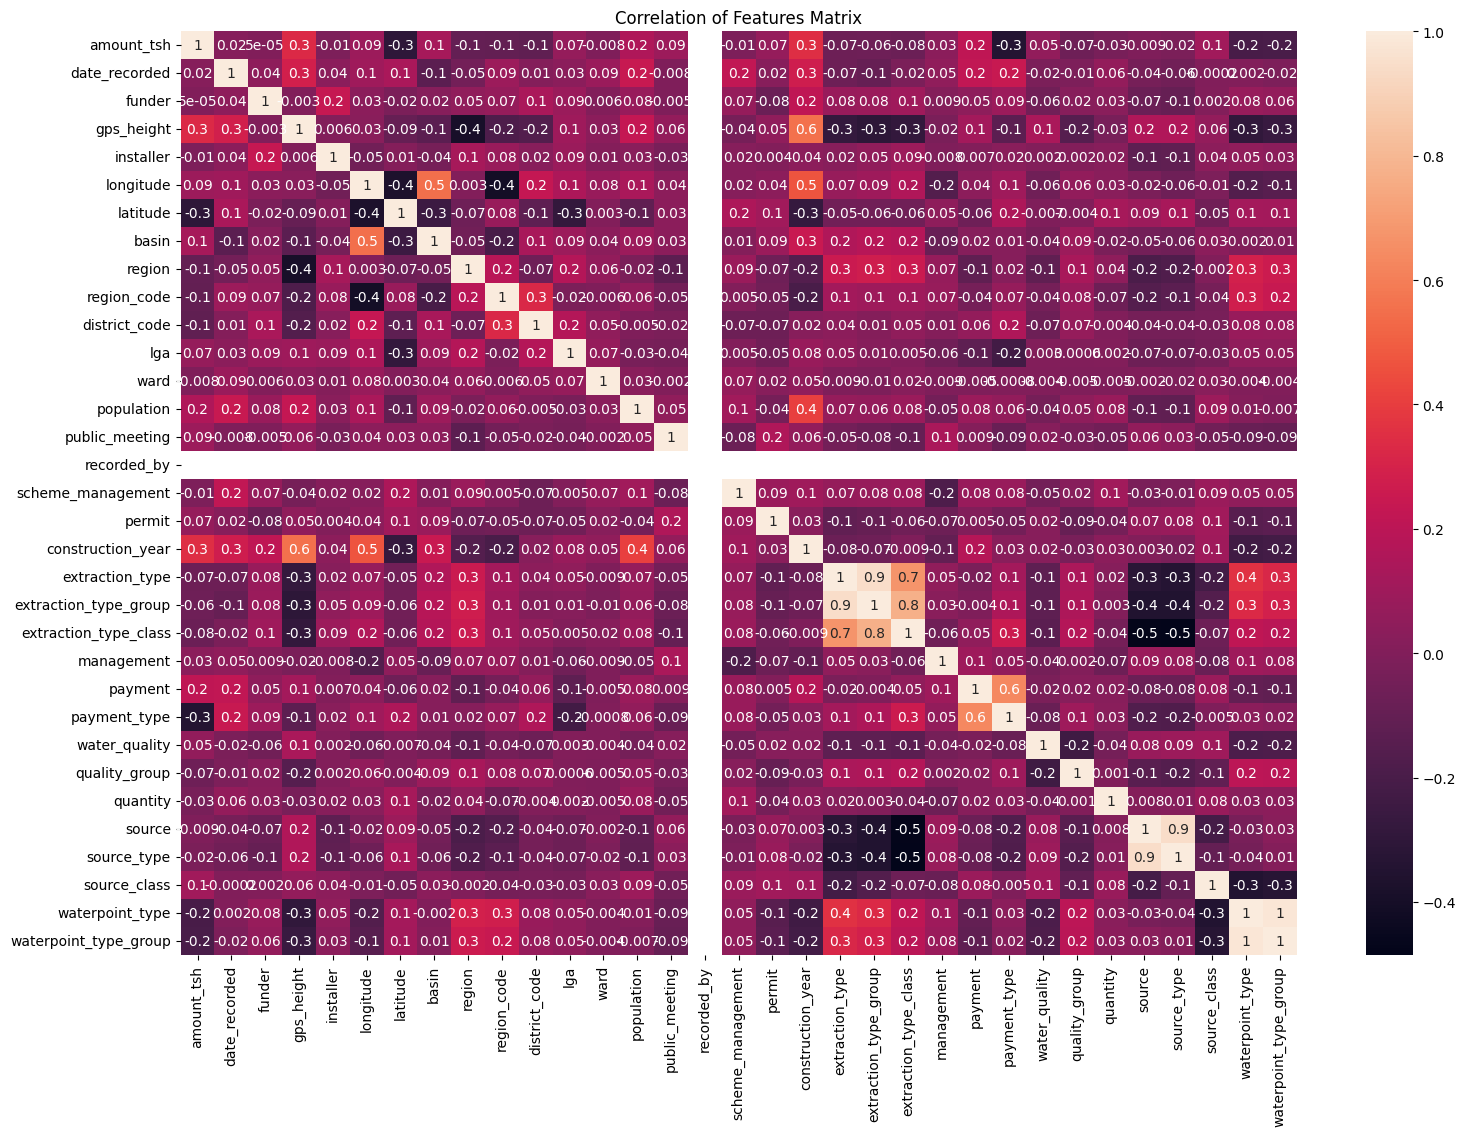

In [21]:
# calculate the correlation matrix
corrMatrix = df_tr2.corr()

plt.subplots(figsize=(18,12))
sns.heatmap(corrMatrix, annot=True, fmt='.1g')
plt.title('Correlation of Features Matrix')
plt.show()


In [22]:
# feature selection
# find columns with correlation greater than 0.9  
corr_threshold = 0.9
corr_matrix_abs = corrMatrix.abs()
corr_pairs = np.where(corr_matrix_abs > corr_threshold)
correlated_features = set()
for i, j in zip(*corr_pairs):
    if i < j:
        correlated_features.add(corrMatrix.columns[j])
        
correlated_features = list(correlated_features)

print("Correlated features: ", correlated_features)


Correlated features:  ['waterpoint_type_group', 'source_type', 'extraction_type_group']


In [23]:
# remove the columns
df_tr2 = df_tr2.drop(columns=correlated_features)
len(df_tr2.columns)

30

## Data Normalization

In [24]:
#import library for data standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  
scaler.fit(df_tr2)

df_tr2 = scaler.transform(df_tr2)

## PCA

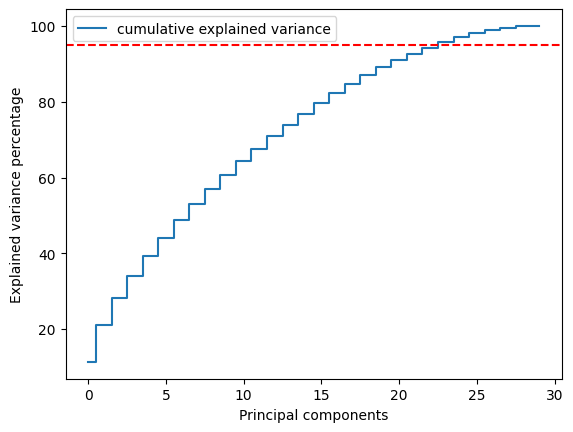

The minimum number of principal components required to capture at least 95% of the total variance is 24


In [25]:
# applying pca
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df_tr2)
# calculate the explained variance percentage of individual components
var_exp = pca.explained_variance_ratio_ * 100

# calculate the cumulative explained variance percentage
cum_var_exp = np.cumsum(var_exp) 

fig, ax = plt.subplots()
ax.step(range(len(cum_var_exp)), cum_var_exp, where='mid', label='cumulative explained variance')
ax.set_ylabel('Explained variance percentage')
ax.set_xlabel('Principal components')
ax.axhline(y=95, color='r', linestyle='--')
ax.legend(loc='best')
plt.show()
n_components = np.where(cum_var_exp >= 95)[0][0] + 1
print(f"The minimum number of principal components required to capture at least 95% of the total variance is {n_components}")


In [26]:
# n = 24
pca = PCA(n_components=24)
label = target
train = df_tr2
new_train = pca.fit_transform(train)

([<matplotlib.axis.XTick at 0x28d4c6750>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

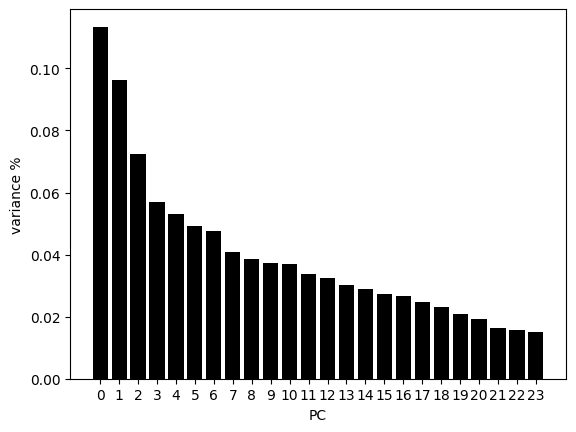

In [27]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PC')
plt.ylabel('variance %')
plt.xticks(features)


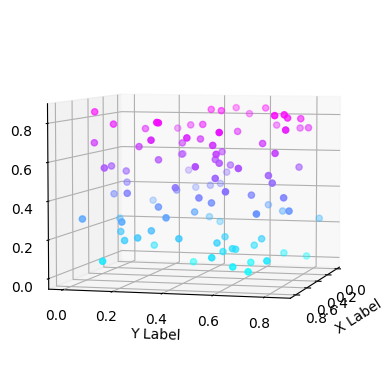

In [28]:
# draw a 3d graph to see Seperation
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# generate some random 3D points
np.random.seed(123)
train = np.random.rand(100, 3)

# perform some transformation on the points
new_train_p = np.sin(train)

# create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = new_train_p[:, 2]  # use the third component as the basis for the colors
ax.scatter(new_train_p[:, 0], new_train_p[:, 1], new_train_p[:, 2], c=colors, cmap='cool')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
# Adjust the viewpoint
ax.view_init(elev=5, azim=15) 

plt.show()

## KNN Model

### split dataset

In [29]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y = train_test_split(new_train,label,test_size=0.2,random_state=10)
test_X

array([[-2.21711218,  0.69481966,  2.07039843, ..., -0.1339053 ,
        -0.39476326,  0.95516509],
       [-0.70321589,  1.03507129, -0.95591025, ..., -0.49822205,
        -0.24088165, -0.74895766],
       [ 1.51373237, -0.88654032, -0.25102704, ...,  0.29374519,
        -0.67368225,  0.79233123],
       ...,
       [-0.56687635, -2.47646461, -1.02517411, ...,  1.28771466,
        -0.27229765,  0.53100884],
       [-2.91589173, -0.52200393, -0.87159133, ..., -0.68690613,
         0.15518567,  1.3150273 ],
       [-0.47333039,  2.16880045, -0.02047403, ..., -0.40019456,
         0.38849534, -0.08420548]])

In [30]:
import numpy as np 
import pandas as pd 
 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score


from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


results_list = []
def run_knn(X_train, y_train, X_test, y_test, n_neighbors):
    # Initialize KNN classifier
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)

    # Train the model
    knn.fit(X_train, y_train)

    # Test the model
    y_pred = knn.predict(X_test)

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='weighted')
    results = {'n_neighbors': n_neighbors, 'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1}
    print(results)
    results_list.append(results)
    # Return the results as a dictionary
#     return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1}
    return results




In [31]:
results_list.clear()

## Traning the model

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Random k 
k_values = [1, 5, 7, 9, 11, 13, 15, 17, 19, 21]

best_k = None
best_accuracy = 0.0

for k in k_values:
    # Train a KNN model on the training set using this k value
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_X, train_y)
    
    # Evaluate the model on the validation set
    y_pred = knn.predict(test_X)
    accuracy = accuracy_score(test_y, y_pred)
    
    # Check if this is the best k value so far
    if accuracy > best_accuracy:
        best_k = k
        best_accuracy = accuracy



print(best_k)
print(best_accuracy)
# knn = KNeighborsClassifier(n_neighbors=8)
# knn.fit(train_X,train_y)

5
0.7648423902533359


## Accuracy Evaluation

In [33]:
results_list.clear()

In [34]:
run_knn(train_X,train_y,test_X,test_y,5)

{'n_neighbors': 5, 'accuracy': 0.7648423902533359, 'precision': 0.6793018849890271, 'recall': 0.6213907853370583, 'f1': 0.7572427883117414}


{'n_neighbors': 5,
 'accuracy': 0.7648423902533359,
 'precision': 0.6793018849890271,
 'recall': 0.6213907853370583,
 'f1': 0.7572427883117414}

## Cross Validation

In [35]:
from sklearn.model_selection import cross_val_score

scores_a = cross_val_score(knn,new_train, label, cv=10, scoring='accuracy')

scores_p = cross_val_score(knn, new_train, label, cv=10, scoring='precision_macro')

scores_r = cross_val_score(knn, new_train, label, cv=10, scoring='recall_macro')

scores_f1 = cross_val_score(knn, new_train, label, cv=10, scoring='f1_macro')

In [36]:
print(scores_a.mean())
print(scores_p.mean())
print(scores_r.mean())
print(scores_f1.mean())

new_result = {'n_neighbors': 10, 'accuracy':scores_a.mean(), 'precision': scores_p.mean(), 'recall': scores_r.mean(), 'f1': scores_f1.mean()}
results_list.append(new_result)

0.7447058640902787
0.681061374837309
0.5879483895330664
0.6118239915981905


## Find best k

In [37]:
# k from 1 to 50
from sklearn import metrics
Kn = 50
acc = np.zeros((Kn-1))
ConfusionMx = [];
for n in range(1,Kn):
    
    # Train model and Predict
    knn_ = KNeighborsClassifier(n_neighbors = n).fit(train_X, train_y)
    y_pre = knn_.predict(test_X)
    acc[n-1] = metrics.accuracy_score(test_y, y_pre)

In [38]:
acc

array([0.74782441, 0.76068459, 0.76871011, 0.76658287, 0.76484239,
       0.76174821, 0.76319861, 0.76039451, 0.76039451, 0.75691356,
       0.75720364, 0.75459292, 0.75391607, 0.75062851, 0.74482692,
       0.74569716, 0.74395668, 0.74298975, 0.74327983, 0.73979888,
       0.73854187, 0.73728486, 0.73660801, 0.73544769, 0.73515761,
       0.73477084, 0.73438406, 0.73428737, 0.73361052, 0.7324502 ,
       0.73051634, 0.73012957, 0.73119319, 0.73274028, 0.73003288,
       0.73080642, 0.73090311, 0.73080642, 0.72945272, 0.72877587,
       0.72945272, 0.72848579, 0.72925933, 0.72790563, 0.72732547,
       0.72732547, 0.72568169, 0.72529491, 0.72461806])

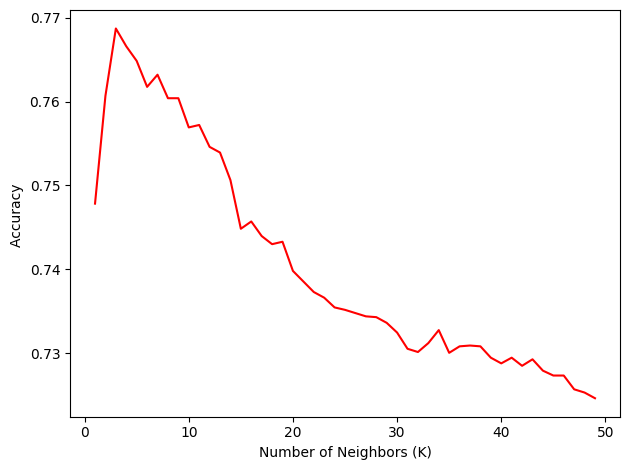

In [39]:
# diagram to find best k
plt.plot(range(1,Kn),acc,'r')
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [40]:
print( "The best accuracy is ", acc.max(), "with k=", acc.argmax()+1) 

The best accuracy is  0.7687101140978534 with k= 3


In [41]:
# add data to results_list
run_knn(train_X,train_y,test_X,test_y,3)

{'n_neighbors': 3, 'accuracy': 0.7687101140978534, 'precision': 0.6885936749548023, 'recall': 0.6344210879388283, 'f1': 0.7624223826878287}


{'n_neighbors': 3,
 'accuracy': 0.7687101140978534,
 'precision': 0.6885936749548023,
 'recall': 0.6344210879388283,
 'f1': 0.7624223826878287}

In [42]:
results_list

[{'n_neighbors': 5,
  'accuracy': 0.7648423902533359,
  'precision': 0.6793018849890271,
  'recall': 0.6213907853370583,
  'f1': 0.7572427883117414},
 {'n_neighbors': 10,
  'accuracy': 0.7447058640902787,
  'precision': 0.681061374837309,
  'recall': 0.5879483895330664,
  'f1': 0.6118239915981905},
 {'n_neighbors': 3,
  'accuracy': 0.7687101140978534,
  'precision': 0.6885936749548023,
  'recall': 0.6344210879388283,
  'f1': 0.7624223826878287}]

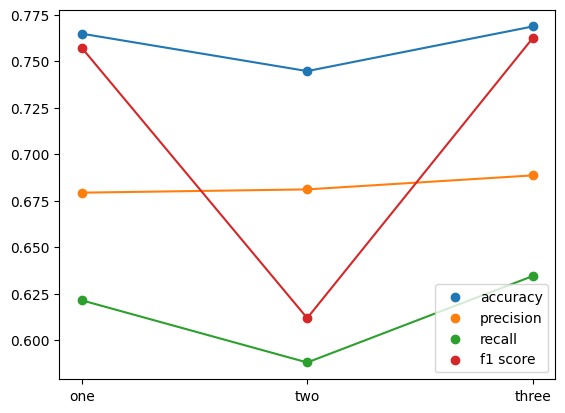

In [43]:
# Set the x-axis labels
x_labels = ['one', 'two', 'three']

x_data = list(range(len(x_labels)))

y_data_accuracy = [result['accuracy'] for result in results_list]

y_data_precision = [result['precision'] for result in results_list]

y_data_recall = [result['recall'] for result in results_list]

y_data_f1 = [result['f1'] for result in results_list]

# Plot the scatter plot for each metric

plt.scatter(x_data, y_data_accuracy, label='accuracy')

plt.scatter(x_data, y_data_precision, label='precision')

plt.scatter(x_data, y_data_recall, label='recall')

plt.scatter(x_data, y_data_f1, label='f1 score')

# Plot the lines between the points

plt.plot(x_data, y_data_accuracy)

plt.plot(x_data, y_data_precision)

plt.plot(x_data, y_data_recall)

plt.plot(x_data, y_data_f1)

plt.xticks(x_data, x_labels)

# Add legend and show plot

plt.legend()

plt.show()